# Задача №2
Для цепи Маркова, заданной стохастической матрицей переходов:
1. [x] нарисовать граф цепи;
2.	[x] выделить классы существенных и несущественных состояний (вручную – обязательно; программным путём – дополнительное задание для желающих);
3.	[x] рассчитать предельные вероятности для классов существенных состояний;
4.	[x] не выполняя матричных операций с полной стохастической матрицей переходов, записать предельные вероятности в следующих случаях:
- [x] если достоверно известно, что система начинает работу в каком-то одном из состояний (для каждого исходного состояния – свой предельный вектор);
- [x] если известно, что начальное распределение вероятностей – равновероятное среди всех несущественных состояний;
5.	[x] провести имитационное моделирование системы, соответствующей рассматриваемой цепи, для этого:
- [x] перебираем все состояния в качестве исходных;
- [x] случайно разыграть переход в новое состояние, учитывая распределение вероятностей перехода;
- [x] совершить 100 переходов;
- [x] подсчитать число вхождений в каждое из состояний системы;
- [x] повторить эксперимент 10 раз для каждого исходного состояния;
- [x] построить «графики» переключений состояний цепи (для наглядности соединяем дискретные точки).


## Подключение библиотек

In [2]:
import numpy as np
import sympy
import seaborn as sb
import csv
import pandas as pd
from random import seed
from random import random, randrange
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph
import imageio.v2 as imageio

## 1. Граф цепи

![graph](graph.png)

## Матрица переходов

In [3]:
P = np.array([[0.12, 0.00, 0.00, 0.00, 0.00, 0.00, 0.52, 0.00, 0.12, 0.00, 0.00, 0.00, 0.24, 0.00, 0.00,
                0.00, 0.15, 0.00, 0.00, 0.20, 0.00, 0.00, 0.40, 0.00, 0.00, 0.15, 0.00, 0.00, 0.00, 0.10,
                0.00, 0.00, 0.24, 0.00, 0.00, 0.00, 0.00, 0.40, 0.00, 0.00, 0.00, 0.24, 0.00, 0.12, 0.00,
                0.00, 0.00, 0.00, 0.00, 0.00, 0.64, 0.00, 0.00, 0.00, 0.36, 0.00, 0.00, 0.00, 0.00, 0.00,
                0.00, 0.22, 0.00, 0.09, 0.19, 0.00, 0.00, 0.00, 0.00, 0.00, 0.25, 0.00, 0.00, 0.00, 0.25,
                0.00, 0.00, 0.00, 0.31, 0.00, 0.33, 0.00, 0.00, 0.00, 0.36, 0.00, 0.00, 0.00, 0.00, 0.00,
                0.22, 0.00, 0.00, 0.00, 0.00, 0.00, 0.27, 0.00, 0.21, 0.00, 0.00, 0.00, 0.30, 0.00, 0.00,
                0.00, 0.00, 0.29, 0.00, 0.00, 0.00, 0.00, 0.29, 0.00, 0.00, 0.00, 0.21, 0.00, 0.21, 0.00,
                0.36, 0.00, 0.00, 0.00, 0.00, 0.00, 0.52, 0.00, 0.12, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
                0.00, 0.00, 0.00, 0.48, 0.00, 0.40, 0.00, 0.00, 0.00, 0.12, 0.00, 0.00, 0.00, 0.00, 0.00,
                0.00, 0.23, 0.00, 0.00, 0.31, 0.00, 0.00, 0.00, 0.04, 0.00, 0.23, 0.00, 0.00, 0.00, 0.19,
                0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.76, 0.00, 0.00, 0.00, 0.00, 0.00, 0.24, 0.00,
                0.12, 0.00, 0.00, 0.00, 0.00, 0.00, 0.52, 0.00, 0.36, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
                0.00, 0.00, 0.12, 0.00, 0.00, 0.00, 0.00, 0.52, 0.00, 0.00, 0.00, 0.12, 0.00, 0.24, 0.00,
                0.00, 0.25, 0.00, 0.00, 0.26, 0.00, 0.00, 0.00, 0.00, 0.00, 0.19, 0.00, 0.00, 0.00, 0.30]]).reshape((15, 15))

## 2. Классы существенных и несущественных состояний

**Жёлтым**, **зелёным** и **оранжевым** выделены классы _существенных_ состояний.

![graph2](graph-3.png)

## Матрицы переходов для каждого из существенных классов

In [4]:
P_yellow = P[np.ix_([3, 5, 9],[3, 5, 9])]
P_green = P[np.ix_([0, 6, 8, 12],[0, 6, 8, 12])]
P_orange = P[np.ix_([2, 7, 11, 13],[2, 7, 11, 13])]

## 3. Находим предельные векторы вероятностей для каждого из существенных классов

In [5]:
# Единичная матрица для каждой матрицы переходов
E_yellow = np.eye(3)
E_green = np.eye(4)
E_orange = np.eye(4)

# Находим (P - E)^T
P_ET_yellow = (P_yellow - E_yellow).T
P_ET_green = (P_green - E_green).T
P_ET_orange = (P_orange - E_orange).T

# Исключаем линейно зависимую строку и добавляем условие sum(p_i) = 1

P_ET_yellow = np.delete(P_ET_yellow, 1, 0)

A = np.vstack([P_ET_yellow, [1, 1, 1]])
b = np.array([0, 0, 1])

# Решаем СЛАУ и получаем вектор предельных вероятностей (для yellow)
pi_yellow = np.linalg.solve(A, b)

# Исключаем линейно зависимую строку и добавляем условие sum(p_i) = 1

P_ET_green = np.delete(P_ET_green, 3, 0)

A = np.vstack([P_ET_green, [1, 1, 1, 1]])
b = np.array([0, 0, 0, 1])

# Решаем СЛАУ и получаем вектор предельных вероятностей (для green)
pi_green = np.linalg.solve(A, b)

# Исключаем линейно зависимую строку и добавляем условие sum(p_i) = 1

P_ET_orange = np.delete(P_ET_orange, 2, 0)

A = np.vstack([P_ET_orange, [1, 1, 1, 1]])
b = np.array([0, 0, 0, 1])

# Решаем СЛАУ и получаем вектор предельных вероятностей (для green)
pi_orange = np.linalg.solve(A, b)

### Для жёлтого существенного класса вектор предельных вероятностей:

In [6]:
pi_yellow

array([0.27431667, 0.43536075, 0.29032258])

### Для зелёного существенного класса вектор предельных вероятностей:

In [7]:
pi_green

array([0.20946979, 0.416     , 0.19945746, 0.17507275])

### Для оранжевого существенного класса вектор предельных вероятностей:

In [8]:
pi_orange

array([0.19818059, 0.43530393, 0.16335627, 0.20315921])

# 4
## 4.1 

Не выполняя матричных операций с полной стохастической матрицей переходов, записать предельные вероятности в случае если достоверно известно, что система начинает работу в каком-то одном из состояний (для каждого исходного состояния – свой предельный вектор).

Есть исходная матрица переходов. Необходимо сжать её. Для этого составляем новую матрицу переходов, в которой:

1. Идут строки и столбцы несущественного класса
2. Представление 1 существенного класса как 1 состояния, соответсвенно, в нашем случае прибавляется еще 3 строки и 3 столбца, на диагоналях единицы (так как попав в существенное состояние, из него уже не выйти), остальные значения равны нулю.

In [9]:
# Матрица переходов для несущественного класса
P_gray = P[np.ix_([1, 4, 10, 14, 3, 7, 8],[1, 4, 10, 14, 3, 7, 8])]

# P_new = np.pad(P_gray, ((0,3),(0,3)), mode='constant', constant_values=0)
P_new = P_gray
P_new[4, 4] = 1
P_new[5, 5] = 1
P_new[6, 6] = 1

## Новая матрица переходов

In [10]:
P_new

array([[0.15, 0.2 , 0.15, 0.1 , 0.  , 0.4 , 0.  ],
       [0.22, 0.19, 0.25, 0.25, 0.09, 0.  , 0.  ],
       [0.23, 0.31, 0.23, 0.19, 0.  , 0.  , 0.04],
       [0.25, 0.26, 0.19, 0.3 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

## Нахождение предельного вектора

### Начальное состояние = 1

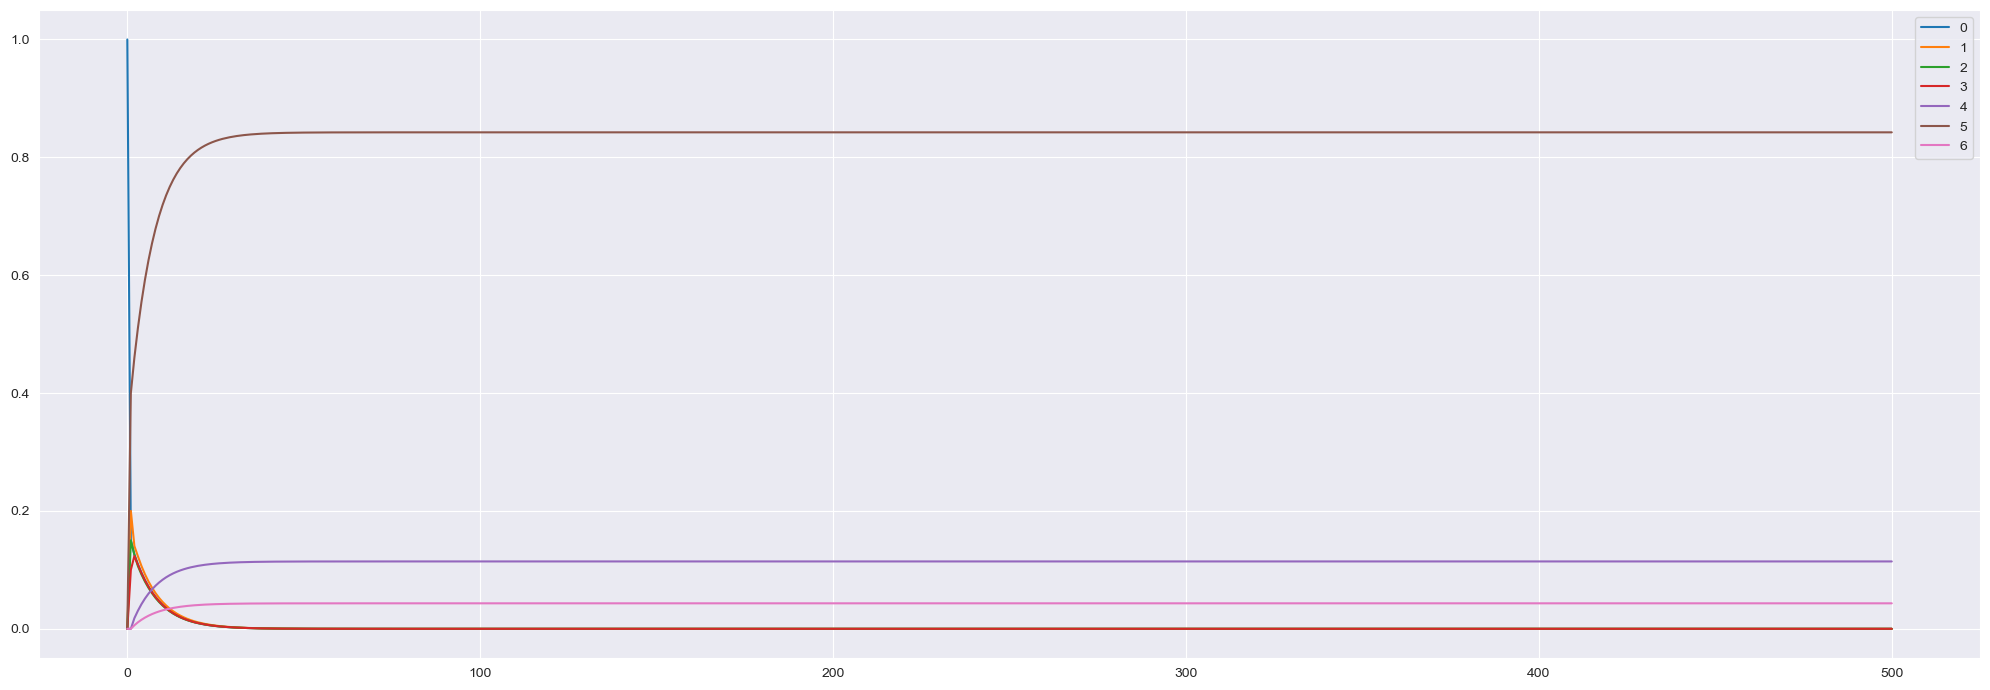

array([[2.81716667e-32, 3.15458050e-32, 2.73268726e-32, 2.79922953e-32,
        1.14322062e-01, 8.42426264e-01, 4.32516749e-02]])

In [42]:
plt.rcParams["figure.figsize"] = [20, 7]
plt.rcParams["figure.autolayout"] = True

state=np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0, 0 ,0 , 0, 0, 0, 0]]
for x in range(500):
    state=np.dot(state,P_new)
    stateHist=np.append(stateHist,state,axis=0)
    dfDistrHist = pd.DataFrame(stateHist)
dfDistrHist.plot()
plt.show()
state

### Начальное состояние = 2

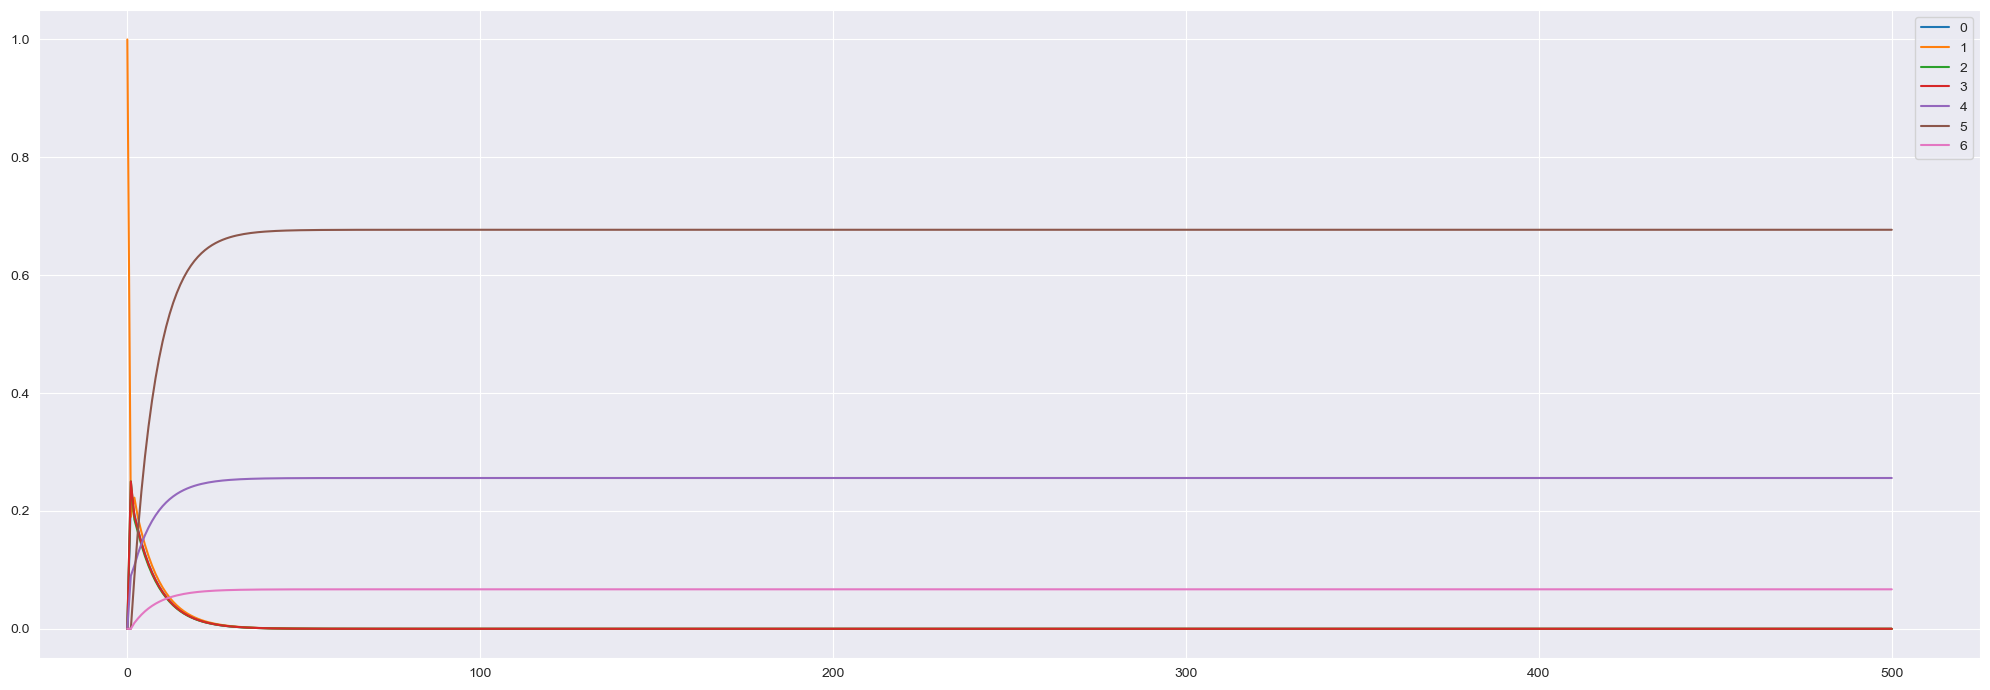

array([[4.33711439e-32, 4.85657332e-32, 4.20705575e-32, 4.30949962e-32,
        2.55890480e-01, 6.77096744e-01, 6.70127757e-02]])

In [43]:
state=np.array([[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0, 0 ,0 , 0, 0, 0, 0]]
for x in range(500):
    state=np.dot(state,P_new)
    stateHist=np.append(stateHist,state,axis=0)
    dfDistrHist = pd.DataFrame(stateHist)
dfDistrHist.plot()
plt.show()
state

### Начальное состояние = 3

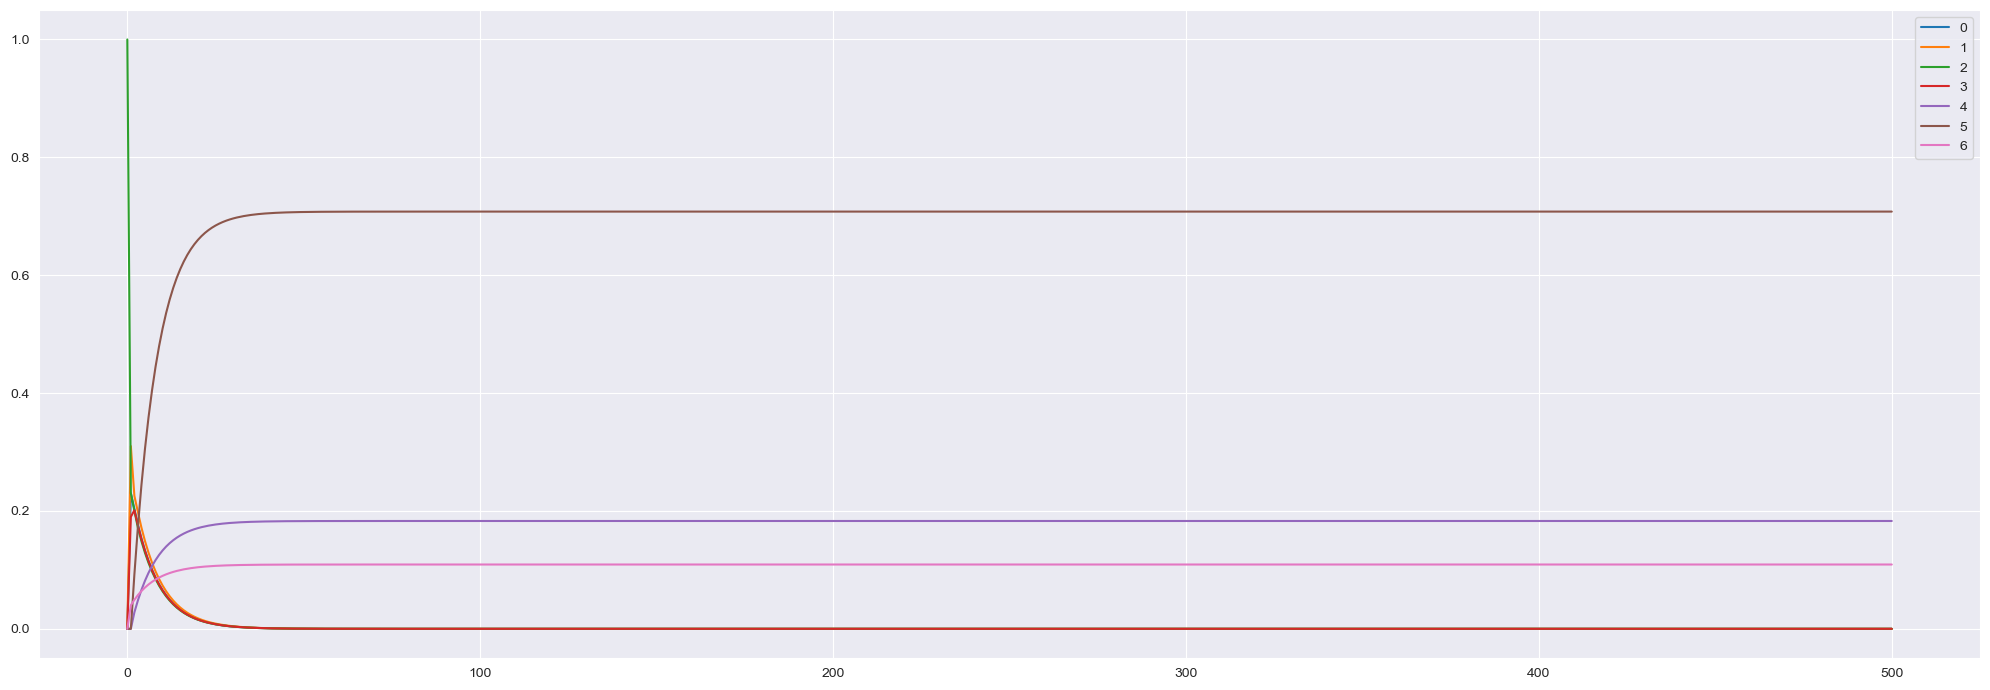

array([[4.53674477e-32, 5.08011355e-32, 4.40069974e-32, 4.50785894e-32,
        1.82949640e-01, 7.07942829e-01, 1.09107532e-01]])

In [44]:
state=np.array([[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]])
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0, 0 ,0 , 0, 0, 0, 0]]
for x in range(500):
    state=np.dot(state,P_new)
    stateHist=np.append(stateHist,state,axis=0)
    dfDistrHist = pd.DataFrame(stateHist)
dfDistrHist.plot()
plt.show()
state

### Начальное состояние = 4

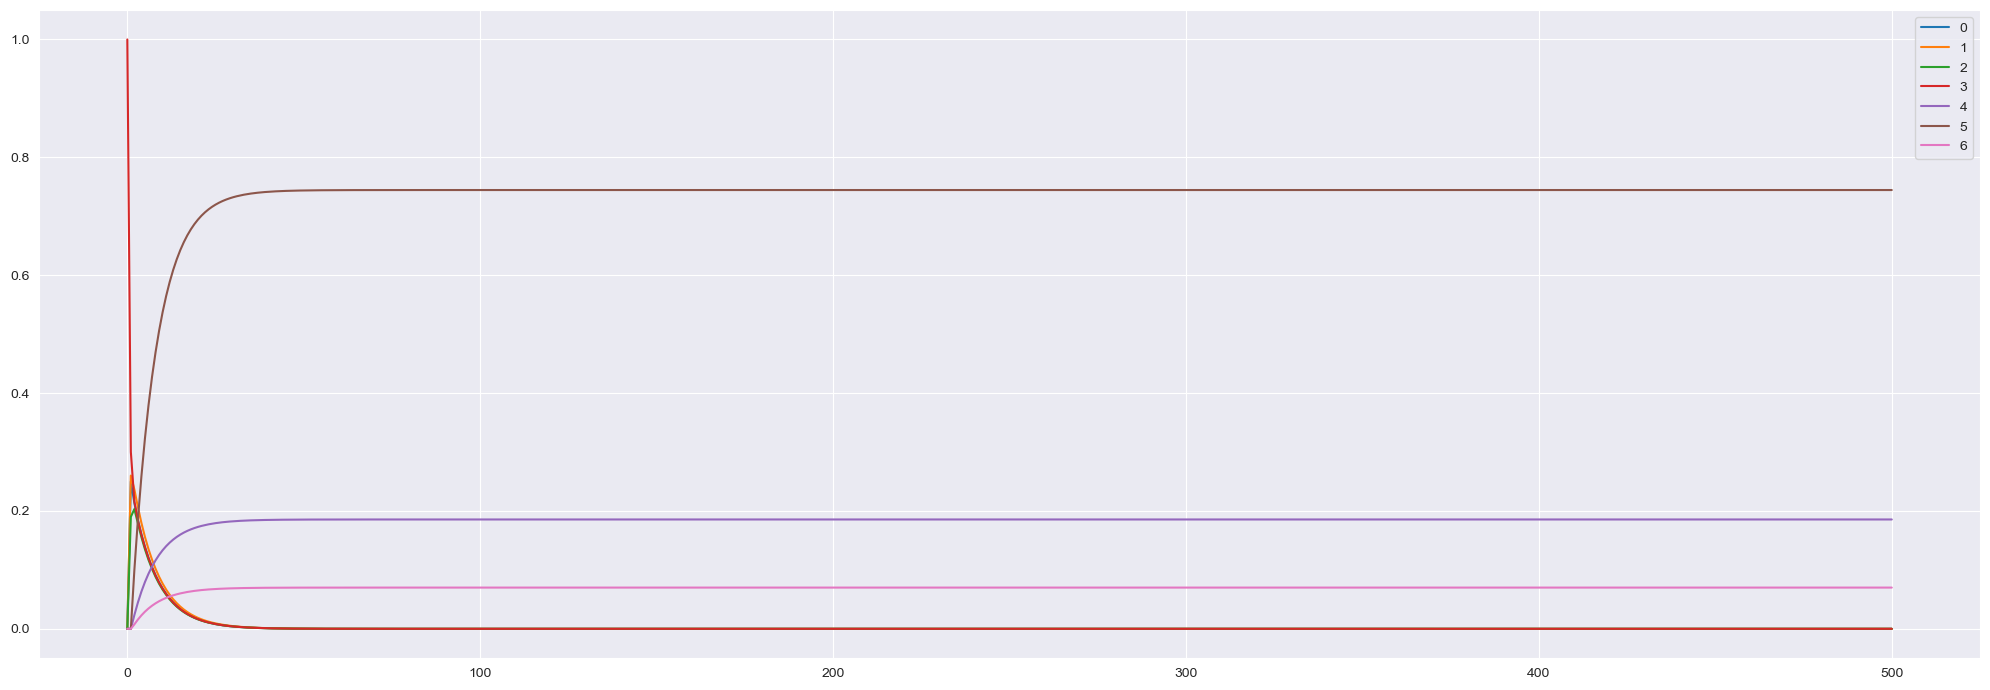

array([[4.74398569e-32, 5.31217585e-32, 4.60172606e-32, 4.71378034e-32,
        1.85532103e-01, 7.44515510e-01, 6.99523877e-02]])

In [45]:
state=np.array([[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]])
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0, 0 ,0 , 0, 0, 0, 0]]
for x in range(500):
    state=np.dot(state,P_new)
    stateHist=np.append(stateHist,state,axis=0)
    dfDistrHist = pd.DataFrame(stateHist)
dfDistrHist.plot()
plt.show()
state

### Начальное состояние = 5 (аналогично будет у 6 и 7)

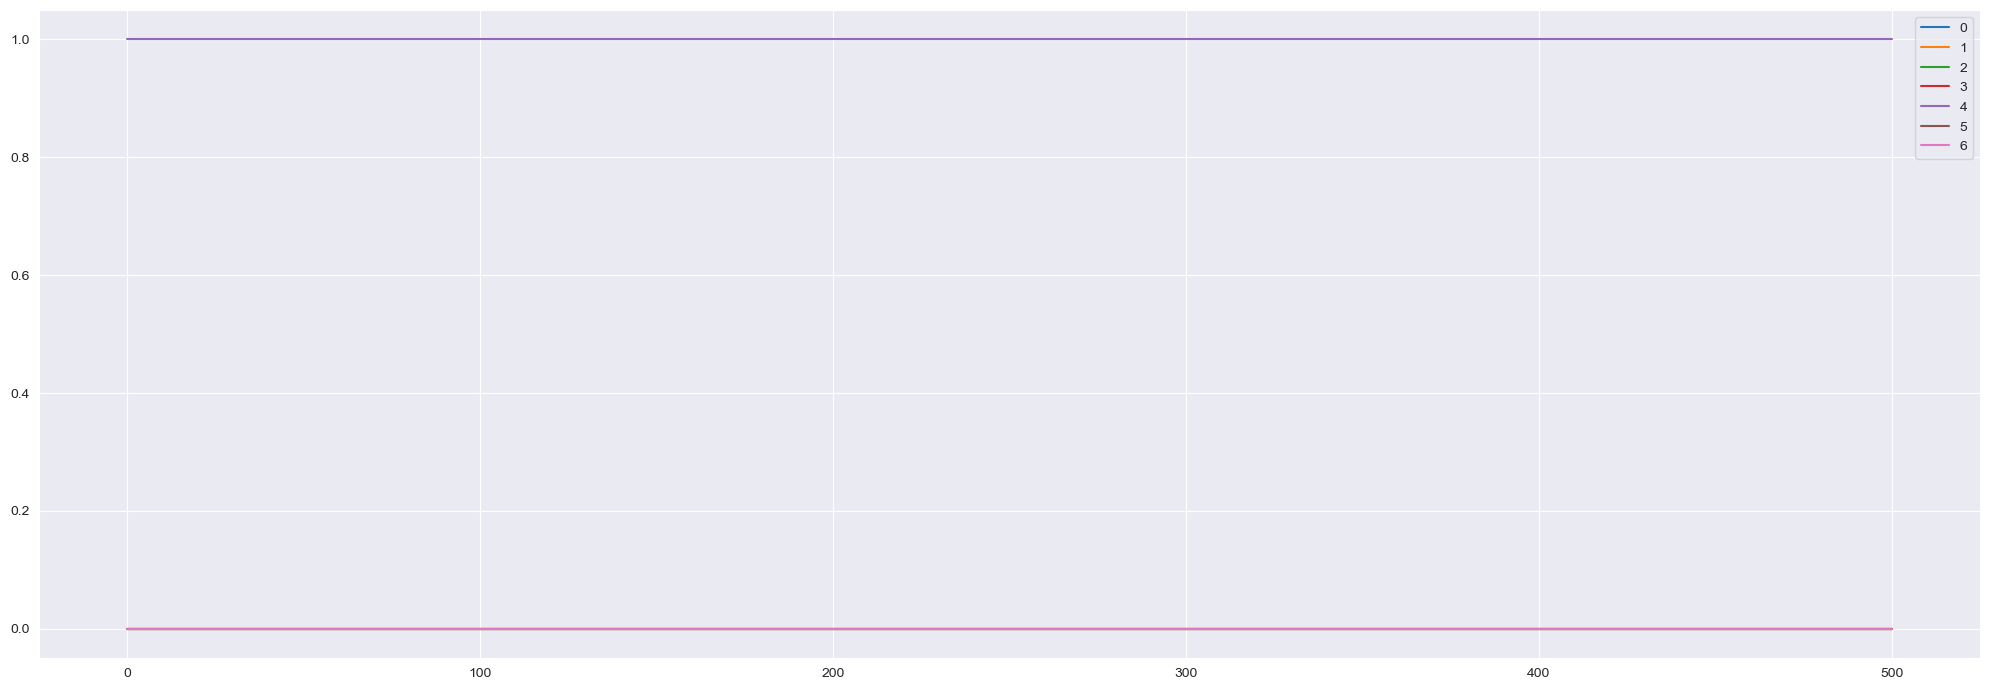

array([[0., 0., 0., 0., 1., 0., 0.]])

In [46]:
state=np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]])
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0, 0 ,0 , 0, 0, 0, 0]]
for x in range(500):
    state=np.dot(state,P_new)
    stateHist=np.append(stateHist,state,axis=0)
    dfDistrHist = pd.DataFrame(stateHist)
dfDistrHist.plot()
plt.show()
state

## 4.2

Не выполняя матричных операций с полной стохастической матрицей переходов, записать предельные вероятности в случае если известно, что начальное распределение вероятностей – равновероятное среди всех несущественных состояний.

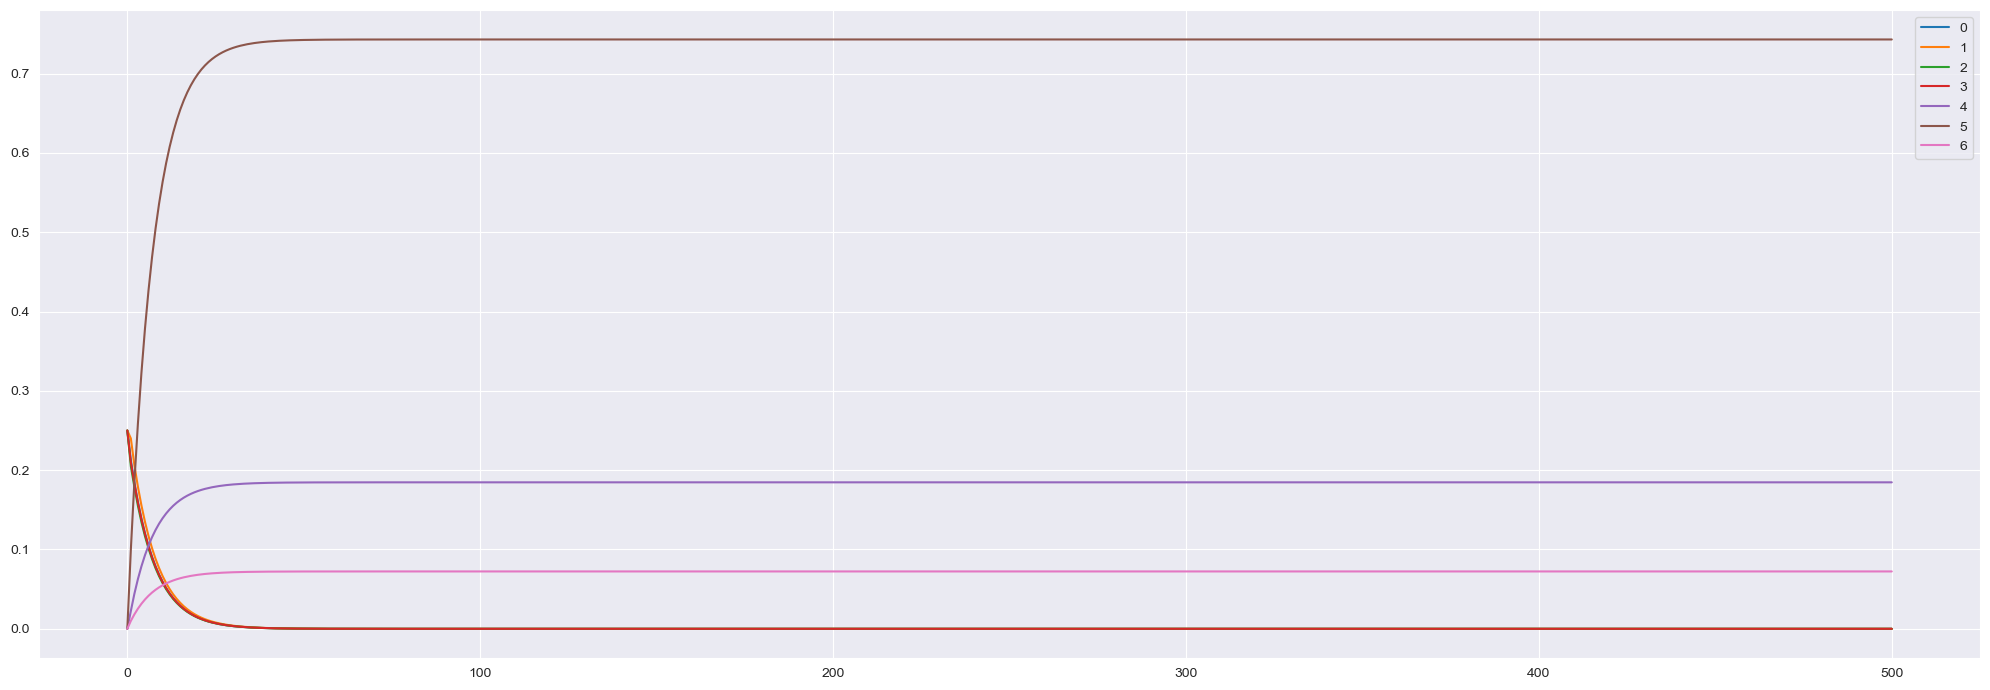

array([[4.10875288e-32, 4.60086080e-32, 3.98554220e-32, 4.08259211e-32,
        1.84673571e-01, 7.42995336e-01, 7.23310925e-02]])

In [47]:
# Первые 4 значения вектора pi равны 0.25 (равновероятны)
state=np.array([[0.25, 0.25, 0.25, 0.25, 0.0, 0.0, 0.0]])
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0, 0 ,0 , 0, 0, 0, 0]]
for x in range(500):
    state=np.dot(state,P_new)
    stateHist=np.append(stateHist,state,axis=0)
    dfDistrHist = pd.DataFrame(stateHist)
dfDistrHist.plot()
plt.show()
state

## 5. Имитационное моделирование системы

### 10 экспериментов для исходного состояния = 1

In [48]:
#Параметры марковской цепи
# Матрица переходов
Q = P

exp_10 = [] # список списков значений относительных частот наблюдений вхождения в каждое из состояний системы
node_sel_10 = [] # список списков последовательностей вершин в каждом эксперименте
num_of_states = 15 # количество состояний в системе
num_of_exp = 10
node_ind = 1 # начальное состояние системы

for exp_v in range(num_of_exp):
    #Задание количества шагов по цепи
    N_steps = 100
    # ЗДЕСЬ МЕНЯЕМ НАЧАЛЬНОЕ СОСТОЯНИЕ СИСТЕМЫ
    # node_ind = randrange(num_of_states) # случайно выбранное начальное состояние
    node_sel = [node_ind] # список вершин, по которым будет проход

    dict_states = {i:0 for i in range(num_of_states)} # число вхождений в каждое из состояний системы

    for i in range(N_steps):
    
        # случайный разыгрыш перехода в новое состояние, учитывая распределение вероятностей перехода 
        temp_ni=np.random.choice(num_of_states,p=Q[node_ind]) 
    
        dict_states[temp_ni] = dict_states[temp_ni] + 1
    
        node_sel.append(temp_ni)
        node_ind=temp_ni
        
    arr_d_val = np.array(list(dict_states.values())) / N_steps
    
    exp_10.append(list(arr_d_val))
    node_sel_10.append(node_sel)

## «Графики» переключений состояний цепи (первые 3 эксперимента) (исх. сост. = 1)

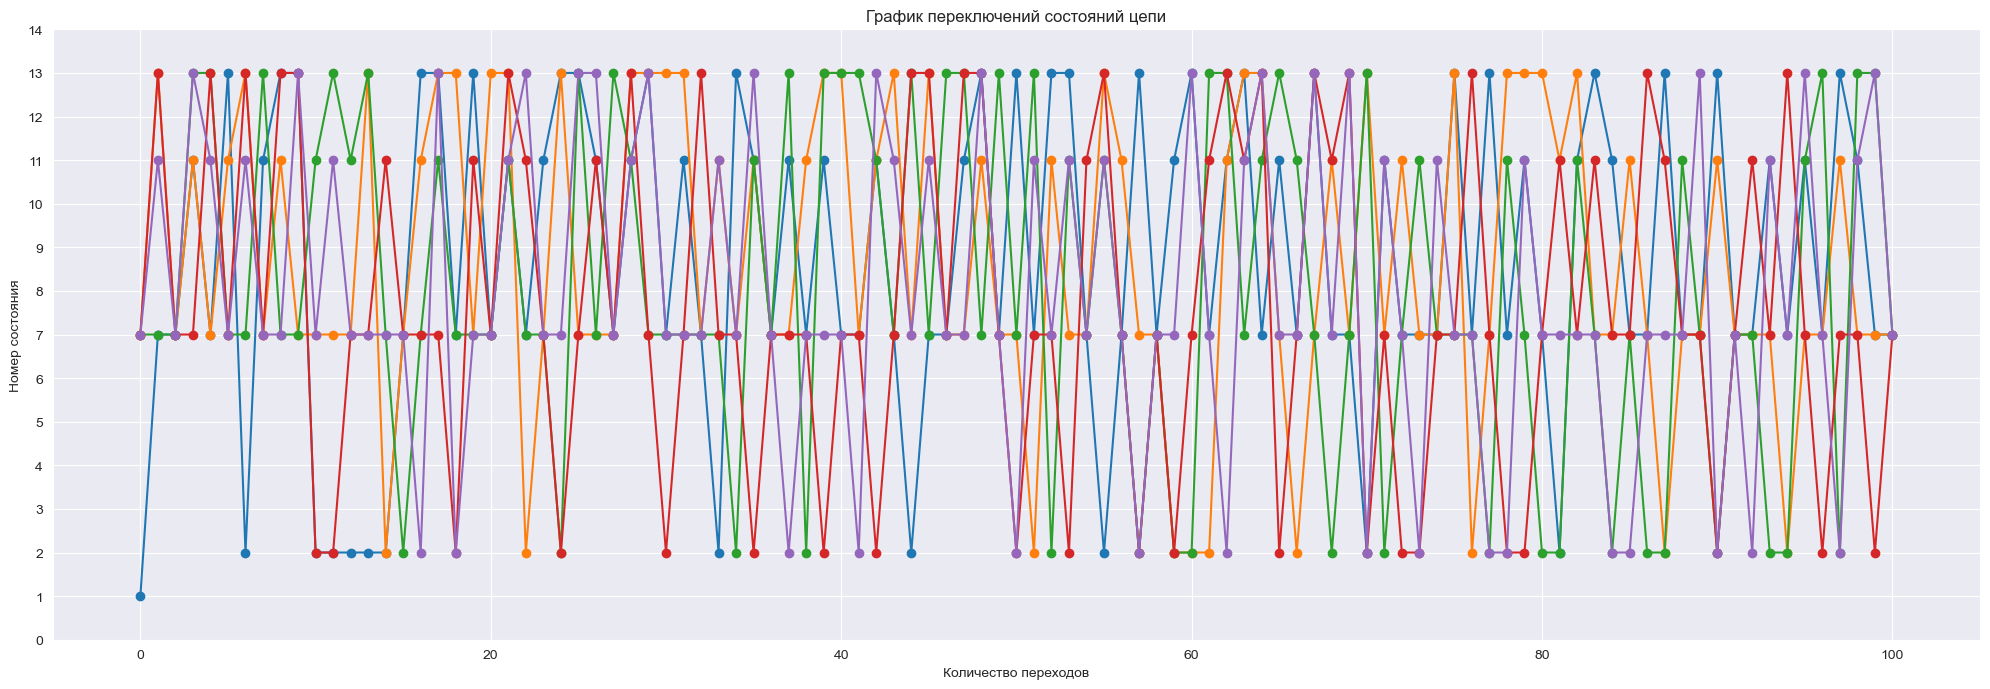

In [49]:
sb.set_style("darkgrid")

plt.xlabel("Количество переходов")
plt.ylabel("Номер состояния")
plt.title("График переключений состояний цепи")
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True

data = np.array(node_sel_10)
for i in range(5):
    plt.plot(node_sel_10[i], marker='o')

plt.yticks([int(i) for i in range(num_of_states)])
plt.show()

## Теперь в цикле начинаем с каждого состояния по очереди

In [50]:
#Параметры марковской цепи
# Матрица переходов
Q = P

exp_final = []
node_sel_final = []

num_of_states = 15 # количество состояний в системе
num_of_exp = 10
# node_ind = 1 # начальное состояние системы

for node_ind in range(num_of_states):
    
    exp_10 = [] # список списков значений относительных частот наблюдений вхождения в каждое из состояний системы
    node_sel_10 = [] # список списков последовательностей вершин в каждом эксперименте
    
    for exp_v in range(num_of_exp):
        #Задание количества шагов по цепи
        N_steps = 100
        # ЗДЕСЬ МЕНЯЕМ НАЧАЛЬНОЕ СОСТОЯНИЕ СИСТЕМЫ
        # node_ind = randrange(num_of_states) # случайно выбранное начальное состояние
        node_sel = [node_ind] # список вершин, по которым будет проход

        dict_states = {i:0 for i in range(num_of_states)} # число вхождений в каждое из состояний системы

        for i in range(N_steps):
    
            # случайный разыгрыш перехода в новое состояние, учитывая распределение вероятностей перехода 
            temp_ni=np.random.choice(num_of_states,p=Q[node_ind]) 
    
            dict_states[temp_ni] = dict_states[temp_ni] + 1
    
            node_sel.append(temp_ni)
            node_ind=temp_ni
        
        arr_d_val = np.array(list(dict_states.values())) / N_steps
    
        exp_10.append(list(arr_d_val))
        node_sel_10.append(node_sel)
    
    exp_final.append(exp_10)
    node_sel_final.append(node_sel_10)

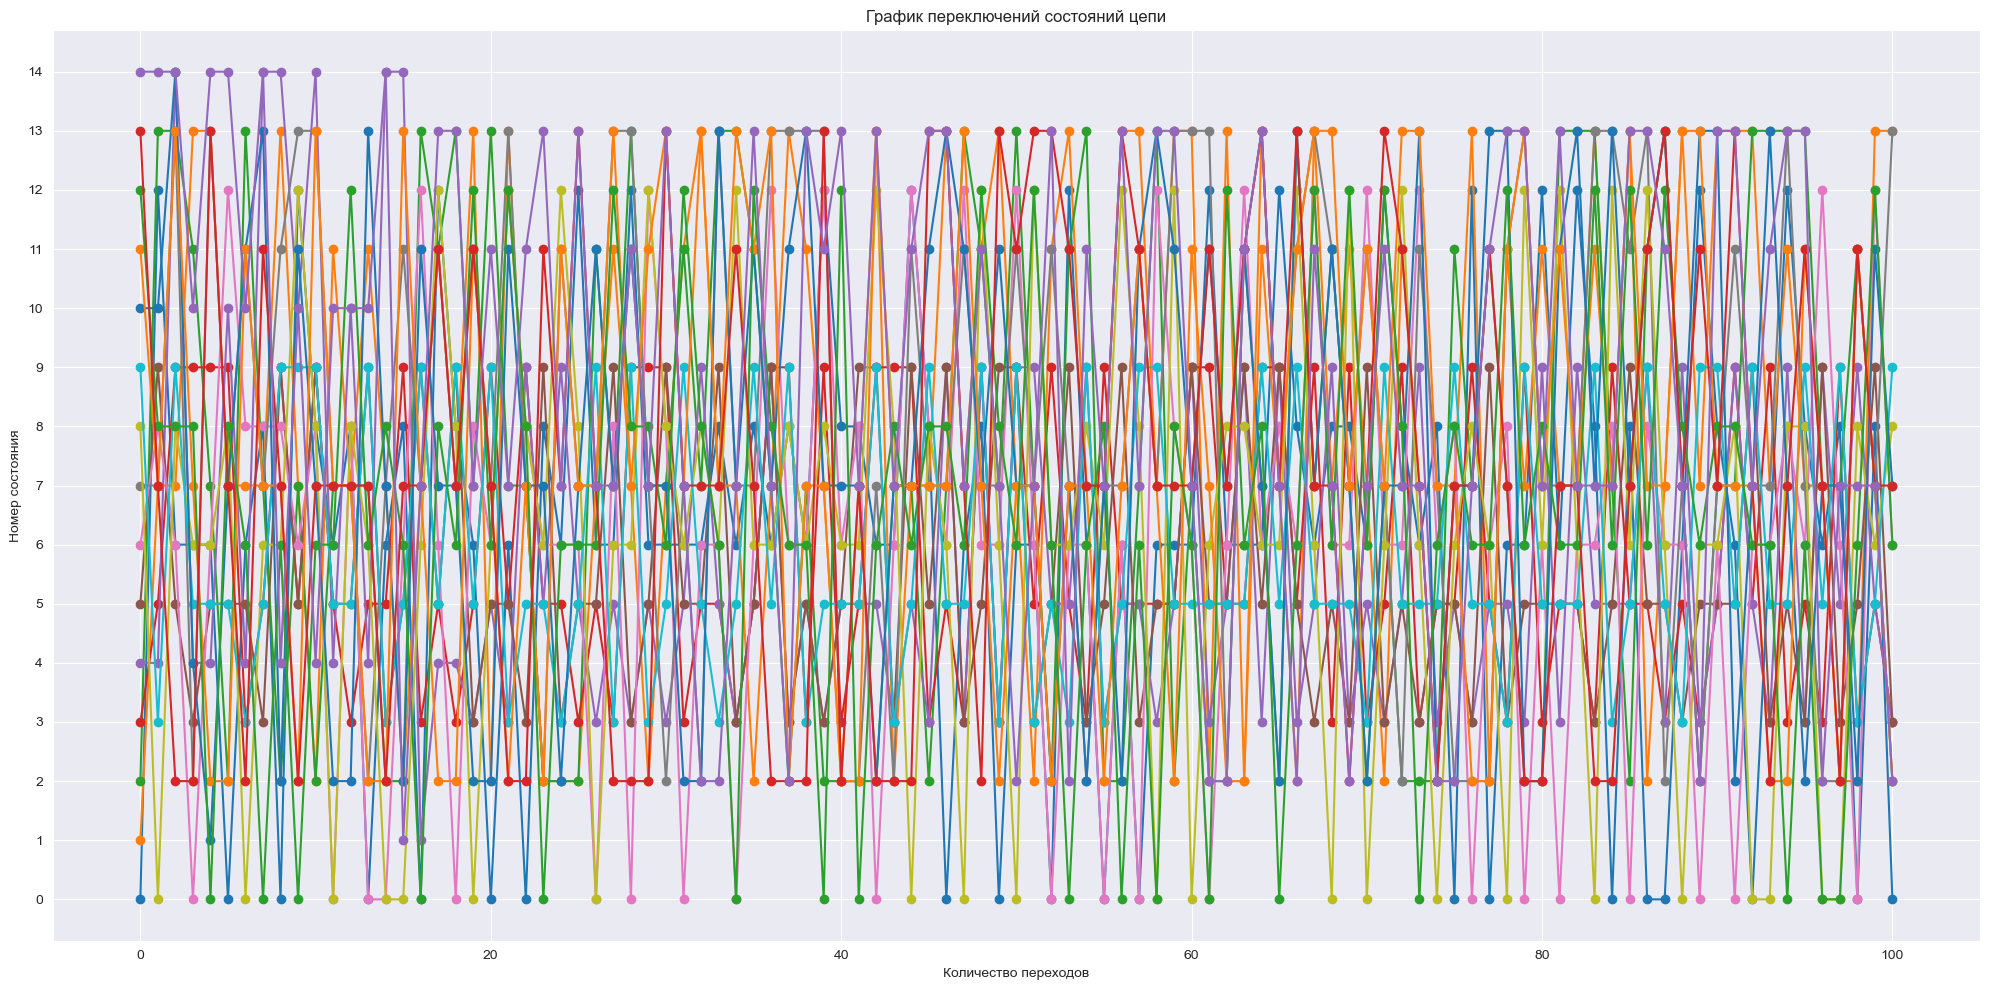

In [51]:
sb.set_style("darkgrid")

plt.xlabel("Количество переходов")
plt.ylabel("Номер состояния")
plt.title("График переключений состояний цепи")
plt.rcParams["figure.figsize"] = [70, 10]
plt.rcParams["figure.autolayout"] = True

data_final = np.array(node_sel_final)
for n in node_sel_final:
    for i in range(1):
        plt.plot(n[i], marker='o')

plt.yticks([int(i) for i in range(num_of_states)])
plt.show()

![graph2](graph-3.png)

## Преобразуем исходную матрицу переходов в соответствии с тем, как расположены классы

In [52]:
PPP = np.array([[0.12, 0.00, 0.00, 0.00, 0.00, 0.00, 0.52, 0.00, 0.12, 0.00, 0.00, 0.00, 0.24, 0.00, 0.00,
                0.00, 0.15, 0.00, 0.00, 0.20, 0.00, 0.00, 0.40, 0.00, 0.00, 0.15, 0.00, 0.00, 0.00, 0.10,
                0.00, 0.00, 0.24, 0.00, 0.00, 0.00, 0.00, 0.40, 0.00, 0.00, 0.00, 0.24, 0.00, 0.12, 0.00,
                0.00, 0.00, 0.00, 0.00, 0.00, 0.64, 0.00, 0.00, 0.00, 0.36, 0.00, 0.00, 0.00, 0.00, 0.00,
                0.00, 0.22, 0.00, 0.09, 0.19, 0.00, 0.00, 0.00, 0.00, 0.00, 0.25, 0.00, 0.00, 0.00, 0.25,
                0.00, 0.00, 0.00, 0.31, 0.00, 0.33, 0.00, 0.00, 0.00, 0.36, 0.00, 0.00, 0.00, 0.00, 0.00,
                0.22, 0.00, 0.00, 0.00, 0.00, 0.00, 0.27, 0.00, 0.21, 0.00, 0.00, 0.00, 0.30, 0.00, 0.00,
                0.00, 0.00, 0.29, 0.00, 0.00, 0.00, 0.00, 0.29, 0.00, 0.00, 0.00, 0.21, 0.00, 0.21, 0.00,
                0.36, 0.00, 0.00, 0.00, 0.00, 0.00, 0.52, 0.00, 0.12, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
                0.00, 0.00, 0.00, 0.48, 0.00, 0.40, 0.00, 0.00, 0.00, 0.12, 0.00, 0.00, 0.00, 0.00, 0.00,
                0.00, 0.23, 0.00, 0.00, 0.31, 0.00, 0.00, 0.00, 0.04, 0.00, 0.23, 0.00, 0.00, 0.00, 0.19,
                0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.76, 0.00, 0.00, 0.00, 0.00, 0.00, 0.24, 0.00,
                0.12, 0.00, 0.00, 0.00, 0.00, 0.00, 0.52, 0.00, 0.36, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
                0.00, 0.00, 0.12, 0.00, 0.00, 0.00, 0.00, 0.52, 0.00, 0.00, 0.00, 0.12, 0.00, 0.24, 0.00,
                0.00, 0.25, 0.00, 0.00, 0.26, 0.00, 0.00, 0.00, 0.00, 0.00, 0.19, 0.00, 0.00, 0.00, 0.30]]).reshape((15, 15))
# Матрица переходов для несущественного класса
P_new_order_1 = PPP[np.ix_([1, 4, 10, 14, 3, 5, 9, 7, 2, 11, 13, 8, 6, 12, 0],[1, 4, 10, 14, 3, 5, 9, 7, 2, 11, 13, 8, 6, 12, 0])]

# permutation = [1, 4, 10, 14, 3, 5, 9, 7, 2, 11, 13, 8, 6, 12, 0]
# permutation = [1, 4, 10, 14, 3, 7, 8, 5, 9, 2, 11, 13, 6, 12, 0]

P_new_order_1

array([[0.15, 0.2 , 0.15, 0.1 , 0.  , 0.  , 0.  , 0.4 , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ],
       [0.22, 0.19, 0.25, 0.25, 0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ],
       [0.23, 0.31, 0.23, 0.19, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.04, 0.  , 0.  , 0.  ],
       [0.25, 0.26, 0.19, 0.3 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.64, 0.36, 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.31, 0.33, 0.36, 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.48, 0.4 , 0.12, 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.29, 0.29, 0.21, 0.21,
        0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.4 , 0.24, 0.24, 0.12,
        0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ,

In [53]:
# Матрица переходов
Q = P_new_order_1

exp_final = []
node_sel_final = []

num_of_states = 15 # количество состояний в системе
num_of_exp = 10
# node_ind = 1 # начальное состояние системы

for node_ind in range(num_of_states):
    
    exp_10 = [] # список списков значений относительных частот наблюдений вхождения в каждое из состояний системы
    node_sel_10 = [] # список списков последовательностей вершин в каждом эксперименте
    
    for exp_v in range(num_of_exp):
        #Задание количества шагов по цепи
        N_steps = 100
        # ЗДЕСЬ МЕНЯЕМ НАЧАЛЬНОЕ СОСТОЯНИЕ СИСТЕМЫ
        # node_ind = randrange(num_of_states) # случайно выбранное начальное состояние
        node_sel = [node_ind] # список вершин, по которым будет проход

        dict_states = {i:0 for i in range(num_of_states)} # число вхождений в каждое из состояний системы

        for i in range(N_steps):
    
            # случайный разыгрыш перехода в новое состояние, учитывая распределение вероятностей перехода 
            temp_ni=np.random.choice(num_of_states,p=Q[node_ind]) 
    
            dict_states[temp_ni] = dict_states[temp_ni] + 1
    
            node_sel.append(temp_ni)
            node_ind=temp_ni
        
        arr_d_val = np.array(list(dict_states.values())) / N_steps
    
        exp_10.append(list(arr_d_val))
        node_sel_10.append(node_sel)
    
    exp_final.append(exp_10)
    node_sel_final.append(node_sel_10)

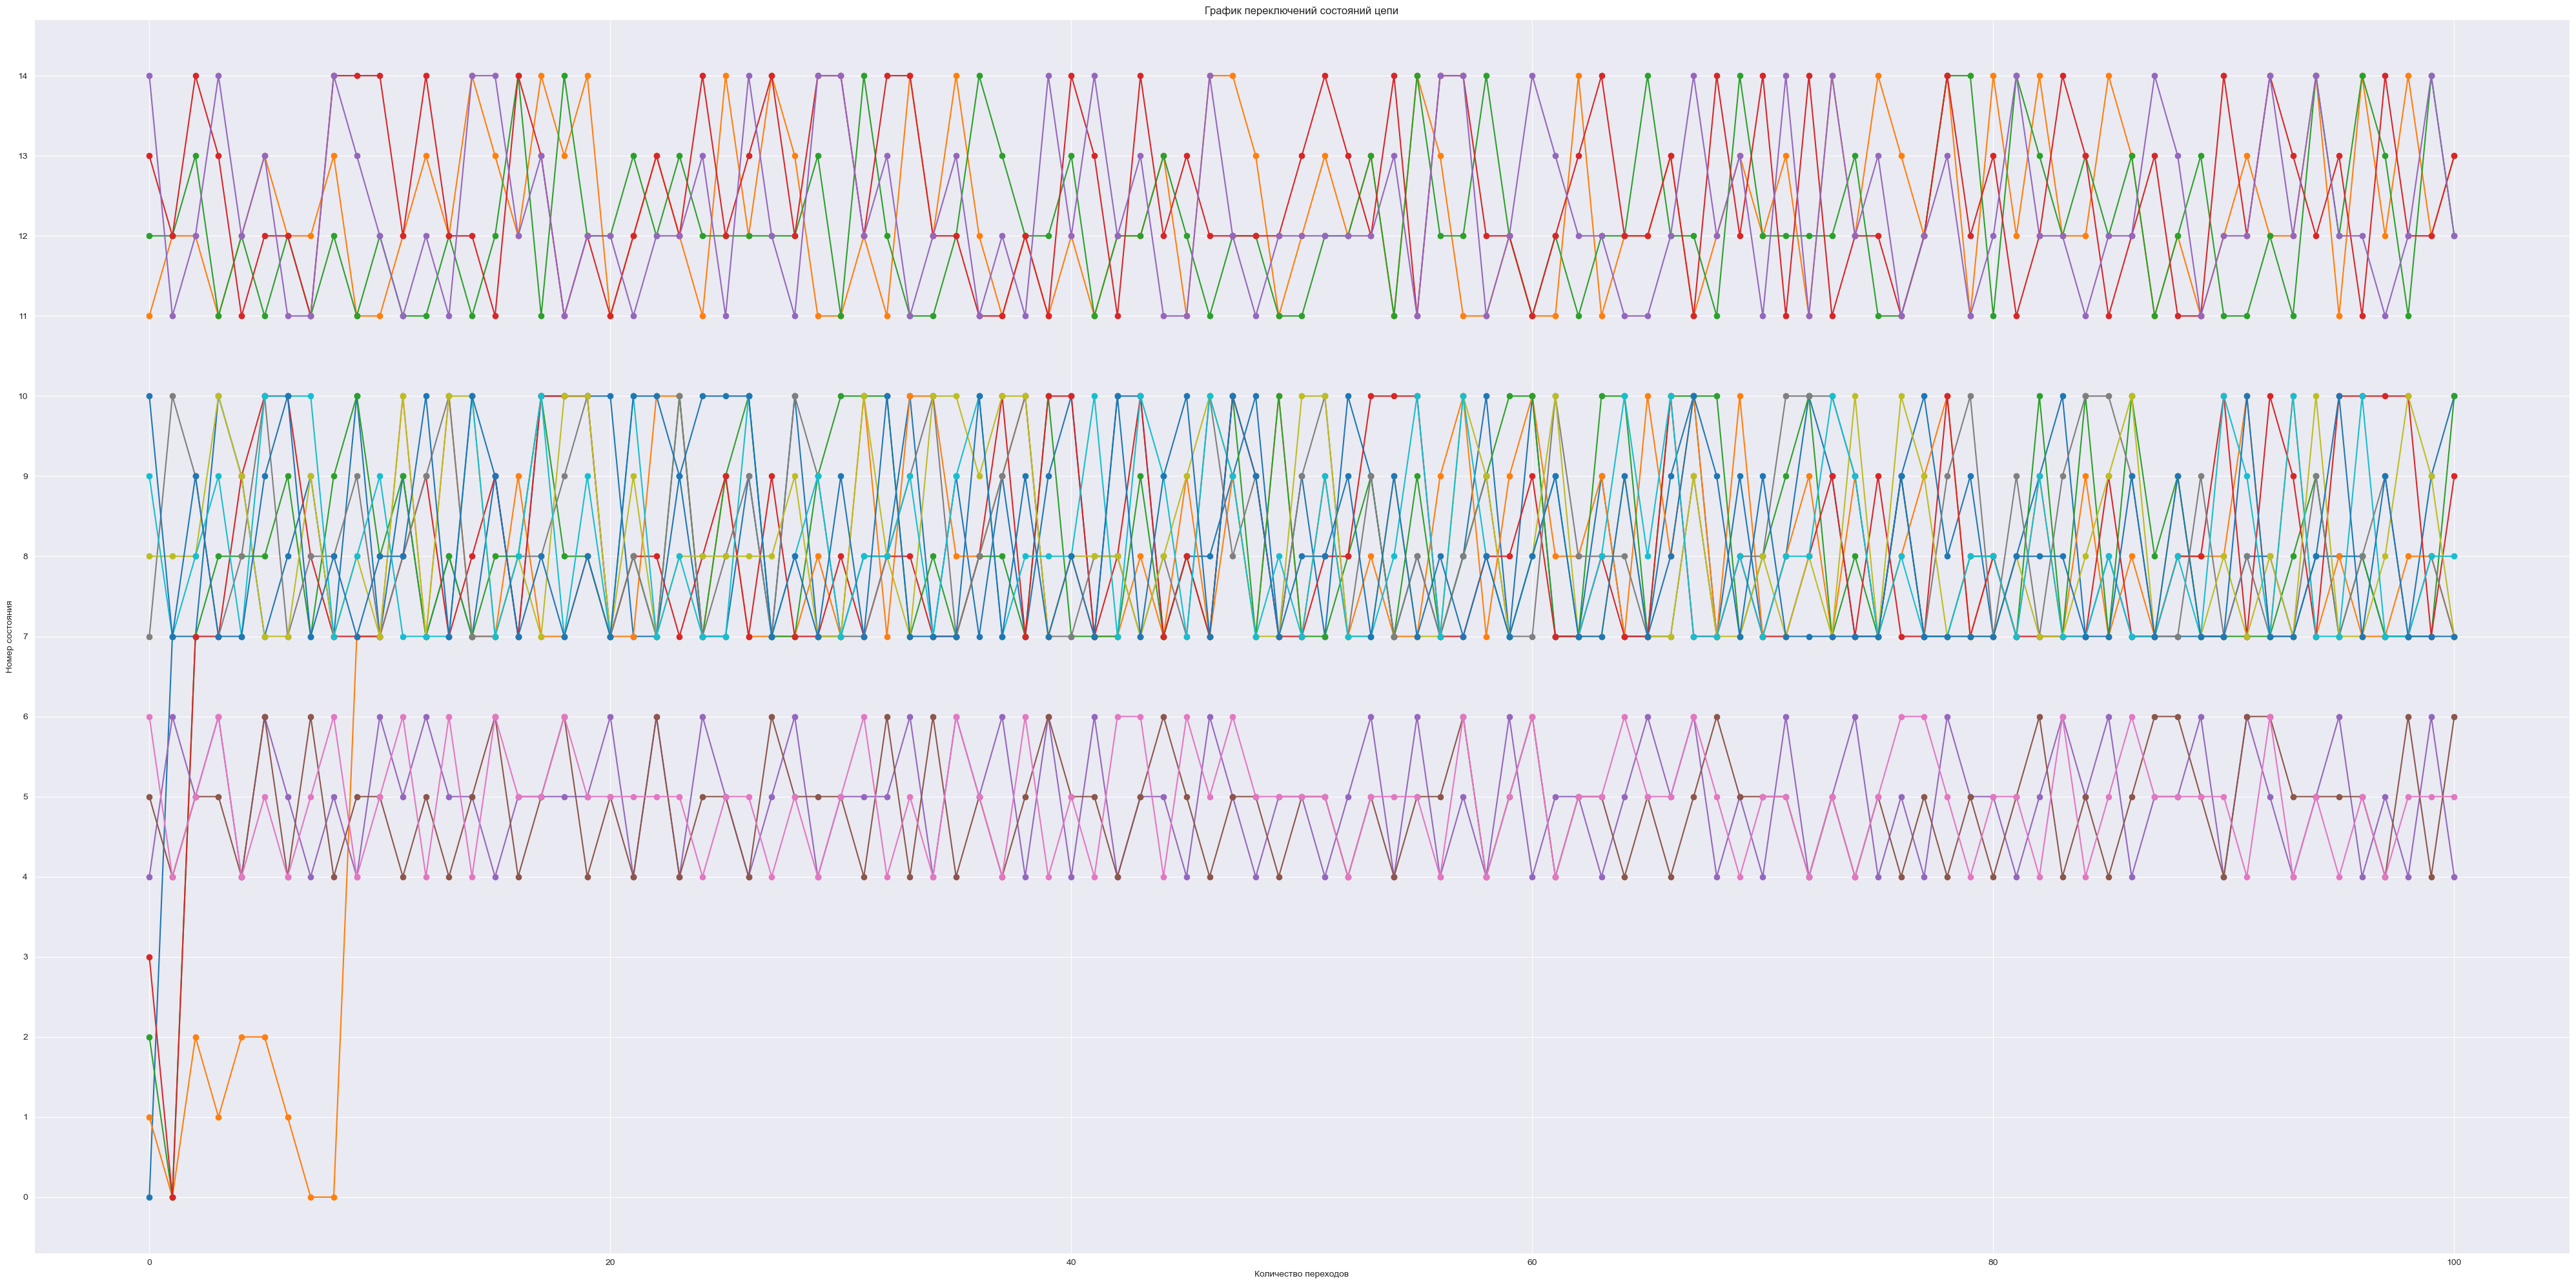

In [58]:
sb.set_style("darkgrid")

plt.xlabel("Количество переходов")
plt.ylabel("Номер состояния")
plt.title("График переключений состояний цепи")
plt.rcParams["figure.figsize"] = [40, 30]
plt.rcParams["figure.autolayout"] = True

data_final = np.array(node_sel_final)
for n in node_sel_final:
    for i in range(1):
        plt.plot(n[i], marker='o')

plt.yticks([int(i) for i in range(num_of_states)])
plt.show()